In [2]:
#common packages we basically always need
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from time import time


{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


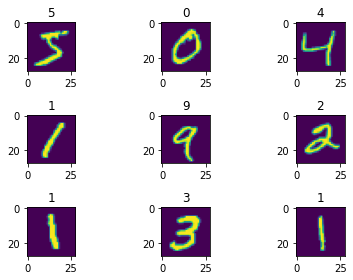

In [35]:
#load the MNIST dataset with binary pixel values
data = sio.loadmat('mnist.mat')
print(data)



Xtrain, Xtest = data['trainX'].astype(float), data['testX'].astype(float)
ytrain, ytest = data['trainY'][0], data['testY'][0]

#pull and plot some samples
for k in range(9):
    plot_data = Xtrain[k,:]
    plot_data = np.reshape(plot_data,(28,28))
    plot_label = ytrain[k]
    plt.subplot(3,3,k+1)
    plt.imshow(plot_data)
    plt.title(plot_label)
plt.tight_layout()

In [36]:
#load the MNIST dataset with binary pixel values
data = sio.loadmat('mnist.mat')
print(data)


select_train = np.logical_or(np.equal(ytrain,4),np.equal(ytrain,9))
select_test = np.logical_or(np.equal(ytest,4),np.equal(ytest,9))
Xtrain = Xtrain[select_train,:]
Xtest = Xtest[select_test,:]
ytrain = np.sign(np.equal(ytrain[select_train],4.)-.5)
ytest = np.sign(np.equal(ytest[select_test],4.)-.5)


m,n = Xtrain.shape
mt = Xtest.shape[0]

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


In [37]:
def getLossFunction(theta):
    loss = 0
    for i in range(m):
        loss += -np.log(1/(1+np.e**(np.dot(np.dot(-ytrain[i],Xtrain[i].T),theta))))
    final_loss = 1/m*loss
    return final_loss

def getGradient(theta):
    indi_grad = 0
    for i in range(m):
        indi_grad += (1/(1+np.e**(np.dot(np.dot(-ytrain[i],Xtrain[i].T),theta))) -1) * np.dot(ytrain[i],Xtrain[i])
    grad = 1/m * indi_grad
    return grad

# TEST SCRIPT. DO NOT MODIFY!
theta = np.linspace(-.1,.1,n)
print('Check number: ', getLossFunction(theta),np.sum(getGradient(theta)))


Check number:  45.19215648734918 12343.17694760448


In [38]:
#accuracy calculation
y_pred = np.zeros(mt)
for i in range(mt):
    y_pred[i] = np.sign(np.dot(Xtest[i],theta))
same_number = np.sum(y_pred == ytest)
accuracy = same_number/mt
accuracy

0.4932194876946258

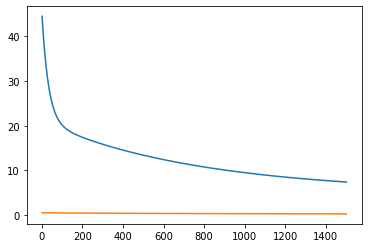

In [41]:
#gradient descent
inter = np.linspace(1,1501,1500)
miscl = np.zeros(1500)
Tloss = np.zeros(1500)
a = 10**-6
theta = np.linspace(-.1,.1,n)
for i in range(len(inter)):
    theta_new =  theta - a*getGradient(theta)
    theta = theta_new
    for j in range(mt):
        y_pred[j] = np.sign(np.dot(Xtest[j],theta))
    same_number = np.sum(y_pred == ytest)
    miscl[i] = 1- same_number/mt
    Tloss[i] = getLossFunction(theta)

plt.plot(inter, Tloss, label = 'train loss')
plt.plot(inter, miscl, label = 'misclassification')

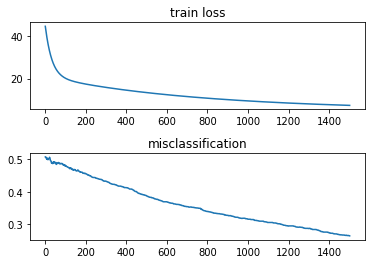

In [48]:
fig, axs = plt.subplots(2)
axs[0].plot(inter, Tloss)
axs[0].set_title('train loss')
axs[1].plot(inter, miscl, label = 'misclassification')
axs[1].set_title('misclassification')
fig.subplots_adjust(hspace=0.5)

In [49]:
print('final train loss is: ', Tloss[-1],' and final miscallsification is ', miscl[-1])

final train loss is:  7.402435856889008  and final miscallsification is  0.26469110999497736


In [5]:

    
def getStochGradient(theta, minibatch):
    return theta
    
# TEST SCRIPT. DO NOT MODIFY!
theta = np.linspace(-.1,.1,n)
print('Check number: ',np.sum(getStochGradient(theta,[1,4,6,2])))


Check number:  0.0


In [ ]:
#you can use time() to measure runtime of things.
#sample runtime code: 

def do_stuff_takes_nseconds(n):
    wait(n)
start = time()
do_stuff_takes_nseconds(n)
print(time()-start, ' seconds to run code')